In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import data_utils as data_utils

dataset = pd.read_csv("datasets/dataset_clean.csv")

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)

dataset.head()

C:\Users\mrugeles\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,ENT_COD_MPIO_is_missing,AFEC_PARENTESCO_is_missing,IDPATOLOGIA_2_is_missing,AFEC_MPIO_is_missing,AFEC_TIPOPER_is_missing,ENT_TIPOVIG_SNS_is_missing,PET_COD_DEPTO_is_missing,AFEC_POBESPECIAL_is_missing,AFEC_EDUC_is_missing,AFEC_REGAFILIACION_is_missing
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,False,False,True,False,False,False,False,False,False,False
1,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,False,False,True,False,False,False,False,False,False,False
2,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,False,False,True,False,False,False,False,False,False,False
3,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,False,False,True,False,False,False,False,False,False,False
4,bogota d.c.,de 13 a 17 años,ninguno,hombre,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,False,False,True,False,False,False,False,False,False,False


## Encoding dataset
All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

In [6]:
encoded_features = data_utils.encode_features(features, labels)
display(encoded_features.head(n = 5))  


--- 19.46178960800171 seconds ---


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,ENT_COD_MPIO_is_missing,AFEC_PARENTESCO_is_missing,IDPATOLOGIA_2_is_missing,AFEC_MPIO_is_missing,AFEC_TIPOPER_is_missing,ENT_TIPOVIG_SNS_is_missing,PET_COD_DEPTO_is_missing,AFEC_POBESPECIAL_is_missing,AFEC_EDUC_is_missing,AFEC_REGAFILIACION_is_missing
0,0.413632,0.457947,0.404291,0.422006,0.43569,0.411426,0.498799,0.425020,0.488333,0.436371,...,0.434739,0.435582,0.456083,0.436161,0.435413,0.439785,0.429094,0.440607,0.443656,0.436354
1,0.367341,0.457947,0.447575,0.455866,0.43569,0.371084,0.459542,0.425020,0.420733,0.436371,...,0.434739,0.435582,0.456083,0.436161,0.435413,0.439785,0.429094,0.440607,0.443656,0.436354
2,0.557791,0.457947,0.488072,0.455866,0.43569,0.564257,0.532725,0.425020,0.420733,0.436371,...,0.434739,0.435582,0.456083,0.436161,0.435413,0.439785,0.429094,0.440607,0.443656,0.436354
3,0.409106,0.457947,0.404291,0.455866,0.43569,0.445723,0.532725,0.526102,0.420733,0.436371,...,0.434739,0.435582,0.456083,0.436161,0.435413,0.439785,0.429094,0.440607,0.443656,0.436354
4,0.413632,0.457947,0.404291,0.455866,0.43569,0.411426,0.498799,0.425020,0.488333,0.436371,...,0.434739,0.435582,0.456083,0.436161,0.435413,0.439785,0.429094,0.440607,0.443656,0.436354


## Store processed dataset

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

encoded_features['RIESGO_VIDA'] = labels

encoded_features.to_csv("datasets/encoded_dataset.csv", index = False)

## Post Processing Exploration

In [9]:
encoded_features.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'CIE_10', 'COD_MACROMOT',
       'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC', 'ENT_COD_DEPTO',
       'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_MPIO_DANE', 'ENT_NOMBRE',
       'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS', 'IDPATOLOGIA_2', 'MES', 'PATOLOGIA_1',
       'PATOLOGIA_TIPO', 'PET_COD_DEPTO', 'PET_MPIO', 'PET_TIPOPER',
       'PQR_CANAL', 'PQR_CLASE_SNS', 'PQR_TIPOPETICION', 'TRIM',
       'ENT_COD_SNS_is_missing', 'ENT_TIPOVIG_is_missing',
       'PATOLOGIA_1_is_missing', 'AFEC_GENERO_is_missing',
       'ENT_NOMBRE_is_missing', 'AFEC_GETNICO_is_missing',
       'PET_TIPOPER_is_missing', 'AFEC_DPTO_is_missing',
       'ENT_AMBITOIVC_is_missing', 'PATOLOGIA_TIPO_is_missing',
       'PET_MPIO_is_missing', 'ENT_MPIO_DANE_is_missing',
       'ENT_COD_DEPTO_is_missing', 'AFEC_EDADR_is_missing',
       'ENT_COD_MPIO_is_

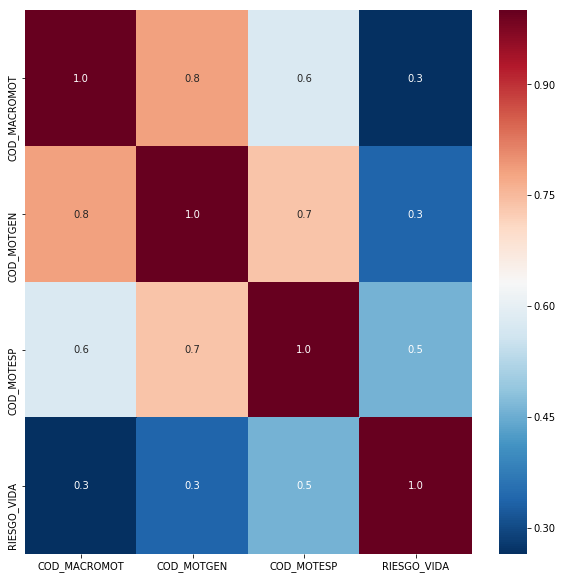

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 10))

ax = sns.heatmap(encoded_features[['COD_MACROMOT', 'COD_MOTGEN', 'COD_MOTESP', 'RIESGO_VIDA']].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')